# MARVEL VERSUS DC UNIVERSE: CLASH OF SUPERHEROES

<img src = 'https://qph.fs.quoracdn.net/main-qimg-3a1e2b034055706ee51a02960e9067df'>

Who is the strongest of both worlds ?

In Comics world, The 'Big Two' (namely DC Comics and Marvel Comics) as nerds used to call them, were always struggling to be crowned as the most diverse with the most powerful characters. This war started 80 years ago when they were were known, respectively, as Timely Comics and National Alliance Publications.

For more insights on this feud, check https://www.dailydot.com/parsec/marvel-vs-dc/

People used to claim the winner based on feelings and how much they love their franchise.
As an attempt to end this feud, we try to answer scienced based to few questions by comparing both on:
- who's the most profilic in terms of created characters ?
- how are they distributed on alignment (good and dark side), gender, height and weight ?
- is height/ weight significantly different from both platforms ?
- are some characters copycats ?
- ... and last not the least, if there is nay difference in power, is it significant enough to conclude that on of the franchise has more powerful characters ?

# Warm up

In [2]:
# loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats # import scipy.stats module as stats to execute the test

In [3]:
powers = pd.read_csv('super_hero_powers.csv') # import super hero powers
info = pd.read_csv('heroes_information.csv') # import heroes info
info = info[info['Publisher'].isin(['DC Comics', 'Marvel Comics'])] # filter info dataframe to DC Comics and Marvel Comics

In [4]:
# Height and Weight Have -99 values. Let's replace them by NaN so they won't affect our upcoming analysis
info.replace(-99, np.nan) # replace -99
info = info.dropna() # we dropped some other NaN
# rename and merge both dataframes
powers.rename(columns={'hero_names':'name'}, inplace=True) #renaming columns so merge will be possible
superheroes = pd.merge(info, powers, how= 'inner', on='name') #merge info and powers

## 1- Number of characters by publisher

Number of character, as number of pblished books can be and indicator of diversity and show how rich is the content of a franchise.

In [5]:
print(str('We are currently working with {} contenders from DC or Marvels.').format(len(superheroes)))

We are currently working with 537 contenders from DC or Marvels.


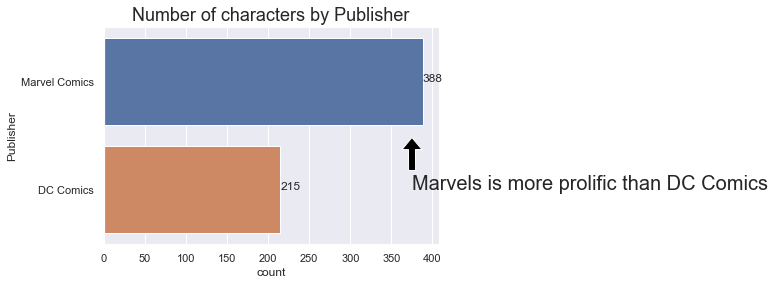

In [6]:
# First plot: Number of characters by publisher
sns.set(style="darkgrid") # set darkgrid as style
ax = sns.countplot(data=info, y='Publisher')
plt.title('Number of characters by Publisher', fontsize=18)

for p in ax.patches:
        count = '{:}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(count, (x, y))
x=375
y=0.5
plt.annotate('Marvels is more prolific than DC Comics', (x,y), xytext=(x+0.3, 1), size = 20, arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7), )
        
plt.show()

In [7]:
print(str('First round: Marvel Comics holds {} characters when DC Comics has only {}.').format(info['Publisher'].value_counts()['Marvel Comics'],info['Publisher'].value_counts()['DC Comics']))

First round: Marvel Comics holds 388 characters when DC Comics has only 215.


## 2- Number of heroes by alignment

Bright or dark side of the balance ? Let's see how goob/evil characters are represented in both franchises:

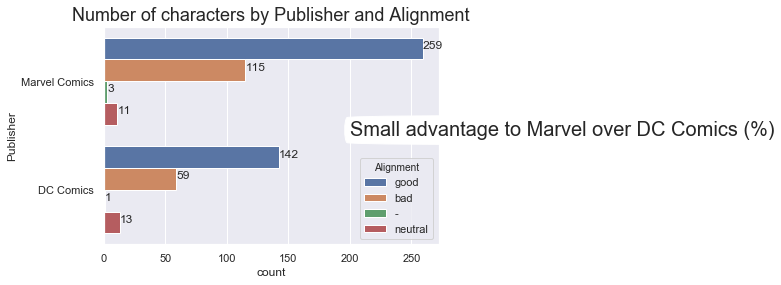

In [8]:
#plot publisher vs alignment
ax = sns.countplot(data=info, y='Publisher', hue='Alignment')
plt.title('Number of characters by Publisher and Alignment', fontsize=18)

for p in ax.patches:
        count = '{:}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(count, (x, y))


# add annotation
x=200
y=0.5
plt.annotate('Small advantage to Marvel over DC Comics (%)', (x,y),  size = 20, bbox=dict(boxstyle="round4", fc="w"))
        
plt.show()

In [9]:
mrep = 100* info['Alignment'][info['Publisher']=='Marvel Comics'].value_counts()/info['Alignment'][info['Publisher']=='Marvel Comics'].count()
drep = 100* info['Alignment'][info['Publisher']=='DC Comics'].value_counts()/info['Alignment'][info['Publisher']=='DC Comics'].count()
print(str('{:.2f} % of good characters with Marvel franchise versus {:.2f} % on DC Comics. These stats are narrow but it looks like we have in Marvel a little preference for good guys !').format(mrep['good'],drep['good']))

66.75 % of good characters with Marvel franchise versus 66.05 % on DC Comics. These stats are narrow but it looks like we have in Marvel a little preference for good guys !


I really wonder why frequencies in terms of percentage are so close ? Is there a rule to follow if you want to be as successful as these franchises in terms of distribution ? Well ...

## 3- Heroes by Gender

How are heroes distributed by gender ? Is there any preference that can me pointed out for any sex ? Let's find out:

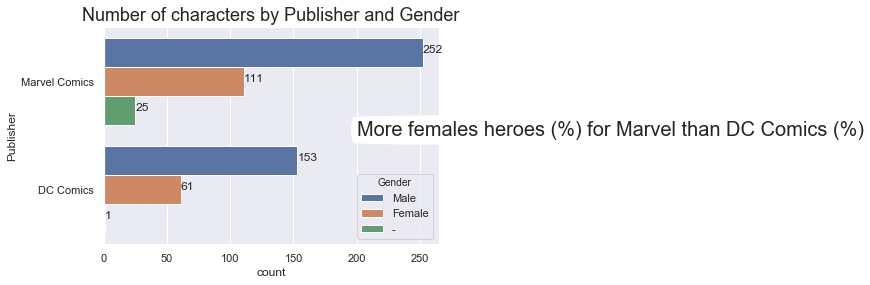

In [10]:
#plot publisher by gender
ax = sns.countplot(data=info, y='Publisher', hue='Gender')
plt.title('Number of characters by Publisher and Gender', fontsize=18)

for p in ax.patches:
        count = '{:}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(count, (x, y))

# add annotation
x=200
y=0.5
plt.annotate('More females heroes (%) for Marvel than DC Comics (%)', (x,y),  size = 20, bbox=dict(boxstyle="round4", fc="w"))
        
plt.show()

In [11]:
mrep = 100* info['Gender'][info['Publisher']=='Marvel Comics'].value_counts()/info['Gender'][info['Publisher']=='Marvel Comics'].count()
drep = 100* info['Gender'][info['Publisher']=='DC Comics'].value_counts()/info['Gender'][info['Publisher']=='DC Comics'].count()
print(str('{:.2f} % of female heroes with Marvel franchise versus {:.2f} % on DC Comics. Here again those stats are close but we have here a small advantage for mMarvel as champion of gender equality with even more undefinded gender characters at {:.2f} %!').format(mrep['Female'],drep['Female'],mrep['-']))

28.61 % of female heroes with Marvel franchise versus 28.37 % on DC Comics. Here again those stats are close but we have here a small advantage for mMarvel as champion of gender equality with even more undefinded gender characters at 6.44 %!


# 3-Heroes by weight and height

Bigger, Heavier attributes can sometimes change everything when it comes to hand to hand fight !

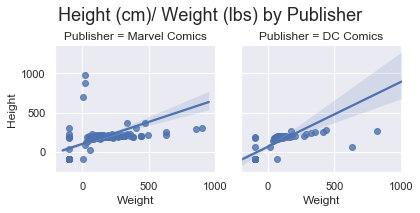

In [12]:
#use facetgrid to plot multiple regplots by pblisher
f = sns.FacetGrid(info, col='Publisher')
f.map(sns.regplot, 'Weight', 'Height')
f.fig.suptitle('Height (cm)/ Weight (lbs) by Publisher', fontsize=18)
f.fig.subplots_adjust(top=0.8)

Extreme individuals are noted in Marvel characters (tallest character and heaviest one). They are then affecting the average.

In [13]:
marv = info[info['Publisher']=='Marvel Comics']
marv[marv['Weight'] == marv['Weight'].max()]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
575,575,Sasquatch,Male,red,-,Orange,305.0,Marvel Comics,-,good,900.0


In [14]:
dc = info[info['Publisher']=='DC Comics']
dc[dc['Weight'] == dc['Weight'].max()]

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
203,203,Darkseid,Male,red,New God,No Hair,267.0,DC Comics,grey,bad,817.0


As example, Sasquatch for Marvel and Darkseid on DC side are the tallest characters of both franchises.  But ...

Is there any really significant difference between Marvel Comics and DC Comics on Height and Weight ?

In [15]:
code = ['Height', 'Weight']
#define a small function that helps print pvalues of list of variables when running t tests
def tee(x): #declare function
    for l in x: #set a loop which take as input var list
        statistics, pvalue = stats.ttest_ind(info[info['Publisher']=='Marvel Comics'][l].dropna(), info[info['Publisher']=='DC Comics'][l].dropna()) #inside the loop execute the T-test between geCOmicsnder and variable 'l'
        print (str('Average mean of {} for Marvel is {:.2f} and DC Comics {:.2f}. T-test on {} from both Comics gives as p-value {:.2f}').format(l, info[info['Publisher']=='Marvel Comics'][l].dropna().mean(), info[info['Publisher']=='DC Comics'][l].mean(),l, pvalue)) #format a print
        
tee(code) #run the function

Average mean of Height for Marvel is 142.76 and DC Comics 91.07. T-test on Height from both Comics gives as p-value 0.00
Average mean of Weight for Marvel is 78.85 and DC Comics 36.15. T-test on Weight from both Comics gives as p-value 0.00


**Rule (5%)**
If p_value > 5% we fail to reject H0. Gender and question 'X' are independants. There is no significant difference between Marvel Comics and DC Comics.
Else, if p_value <= 5%, we reject H0. There is a significant difference between Marvel Comics and DC Comics characters' Height/Weight.

**Conclusion**
All tests conducted at 5% significance level fails to reject Ho (no significant difference).

It means that there is no significant difference here.

# Highlights on Evil Twins

Juggling with so many character, chances are that you will have some similar ones. But between some of then this similarity is so vivid that we can ask ourselves if it is just odd or a copycat effect ... 
These one of the neverending debats between fans of comics. 

Let's just take a look at 2 well known cases:

**Deathstroke and Deadpool**

One of the well known case is between Deathstroke (DC Comics) and Deadpool. Apart of the same visual appearance, our ninjas does share some common abilities.

Reffering to 'http://comicisland.org':

    we know that Deadpool is a direct copy of Deathstroke. Slade Wilson arrived on shelves in the pages of the new teen titans in 1980 and WADE Wilson, entered the scene in 1991.

<img src="https://cdn.shortpixel.ai/client/q_glossy,ret_img,w_800/https://www.comicnity.com/wp-content/uploads/2019/03/deathstroke-vs-deadpool.jpg">

So, how far are they similar ??

In [16]:
a = powers[powers['name']=='Deathstroke']
b = powers[powers['name']=='Deadpool']
c= b.append(a)

d = c.append(c.eq(True).sum(), ignore_index=True)
d['name'][2]='Total'
d = d.T
d.columns = d.iloc[0]
d=d.iloc[1:,:]
d.Total.value_counts()

0    147
1     13
2      7
Name: Total, dtype: int64

In [17]:
print(str('Out of 167 abilities, Deadpool has {} abilities and Deathstroke {}. But they share {} common powers. In fact, they are common on {} characteristics out of 167.').format(d.Deadpool.sum(), d.Deathstroke.sum(), d.Total.value_counts()[0], d.Total.value_counts()[0] + d.Total.value_counts()[2]))

Out of 167 abilities, Deadpool has 16 abilities and Deathstroke 11. But they share 147 common powers. In fact, they are common on 154 characteristics out of 167.


It is obvious that they are really close even in terms of abilities.

Let's see the case of Thanos and Darkseid.

**Thanos / DarkSeid**

<img src="https://lh3.googleusercontent.com/QF5sOUsMkIRn3d6yGZLH5gAvE9HV6pxSUk2t3JRuSjbbsfcM2X5vTKcwNjoKPvcvOem1GRtC7A1NJRFTHCWdOLL5fO1HzhGImJCgarz-ok5jcErrCr11fCVp0IRcrHIgdy37au0R">

In [18]:
a = powers[powers['name']=='Darkseid']
b = powers[powers['name']=='Thanos']
c= b.append(a)

d = c.append(c.eq(True).sum(), ignore_index=True)
d['name'][2]='Total'
d = d.T
d.columns = d.iloc[0]
d=d.iloc[1:,:]
d.Total.value_counts()

0    126
1     23
2     18
Name: Total, dtype: int64

In [19]:
print(str('Out of 167 abilities, Thanos has {} abilities and Darkseid {}. But they share {} common powers. In fact, they are common on {} characteristics out of 167.').format(d.Thanos.sum(), d.Darkseid.sum(), d.Total.value_counts()[0], d.Total.value_counts()[0] + d.Total.value_counts()[2]))

Out of 167 abilities, Thanos has 31 abilities and Darkseid 28. But they share 126 common powers. In fact, they are common on 144 characteristics out of 167.


# Time to power up !

Let's assume that the number of super-abilties a heroes holds could be seen as an indicator of his power. 

Even if it is not true always true (as some abilities could me more impactful), let's assume that it can be an indicator of overall power of a character. In fact, some special abilities can themselves counterbalance a fight. Some of them have a more destructive power. 

But let's start with this assumption and compute Power:

In [20]:
superheroes['power'] = superheroes.iloc[:, 11:].sum(axis=1)

In [21]:
superheroes[['name', 'power']].sort_values('power', ascending=False).head(5)

,name,power
448,Spectre,49
11,Amazo,44
312,Martian Manhunter,35
294,Living Tribunal,35
119,Captain Marvel,33


We can see that at least Captain Marvel is in our Top 5, which make sense, but as stated before, power could be perceived differently...

Now let's see which features are correlated to power. We'll put a focus on gender and alignment as it might be interesting to see if your side or your gender could be linked to how you're powerful.

In [22]:
superheroes['Gender_cod']=superheroes['Gender'].astype('category').cat.codes # put gender as categorical to be able to run correlation on it
superheroes['Alignment_cod']=superheroes['Alignment'].astype('category').cat.codes #put alignment as categorical to be able to run correlation on it

# group selected variables by Publisher to run our tests on both samples
superheroes[['Gender_cod', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher','Skin color', 'Alignment_cod', 'Weight', 'power']].groupby('Publisher').corr()

# compute correlation to power higher than 0.4
superheroes.corr().abs()['power'][superheroes.corr().abs()['power'] > 0.4] 

Agility                0.428920
Accelerated Healing    0.520959
Flight                 0.406129
Super Strength         0.457078
Stamina                0.447793
Super Speed            0.526770
Invulnerability        0.499159
Enhanced Hearing       0.401157
power                  1.000000
Name: power, dtype: float64

Super speed and accelerated Healing a correlated to power. Maybe because these a common abilities most of Heroes do share.


Now.... How is power perceived in both franchises ? Let's see top 3 Heroes per publisher.

In [23]:
superheroes[['Publisher', 'name', 'power']][superheroes['Publisher']=='Marvel Comics'].nlargest(3, 'power') #top 3 of Marvel

,Publisher,name,power
294,Marvel Comics,Living Tribunal,35
118,Marvel Comics,Captain Marvel,33
202,Marvel Comics,Galactus,32


In [24]:
superheroes[['Publisher', 'name', 'power']][superheroes['Publisher']=='DC Comics'].nlargest(3, 'power') #top 3 of DC

,Publisher,name,power
448,DC Comics,Spectre,49
11,DC Comics,Amazo,44
312,DC Comics,Martian Manhunter,35


Living Tribunal and Specters are top form both universes. 

We can see from both tables that powers seems to be higher in DC Comics world. Is this assumption real ?

Lets try so see if ther is any **significant difference in power between DC Comics and Marvels Comics**:

In [25]:
code = ['power']
#define a small function that helps print pvalues of list of variables when running t tests
def tee2(x): #declare function
    for l in x: #set a loop which take as input var list
        M = superheroes[['Publisher', 'power']][superheroes['Publisher']=='Marvel Comics'][l]
        DC = superheroes[['Publisher', 'power']][superheroes['Publisher']=='DC Comics'][l]
        statistics, pvalue = stats.ttest_ind(M, DC) #inside the loop execute the T-test between both Comics and variable 'l'
        print (str('T-test on {} from both Comics gives as p-value {:.2f}').format(l, pvalue)) #format a print
        
tee2(code) #run the function

T-test on power from both Comics gives as p-value 0.18


**Conclusion**
Test conducted at 5% significance level fails to reject Ho (no significant difference).

It means that there is no significant difference here.

# Overall Conclusion

We tried to answer to few questions by comparing both:
- who's the most profilic in terms of created characters ? 

**Marvel**
- how are they distributed on alignment (good and dark side), gender, height and weight ? 

**Similar With a small advantage to Marvel for it's diversity**
- is height/ weight significantly different from both platforms ? 

**Not really**
- are some characters copycats ? 

**Completely yes**
- ... and last not the least, if there is any difference in power, is it significant enough to conclude that on of the franchise has more powerful characters ? 

**Not really**

Additionally, in 2019 projections are giving Marvel as Winners in terms of Overall Sales, even if in pure Comics, Dc is leadind with 'Detectiv Comics'.

|Franchise|Share of Overall Dollars|
|--------|-------|
|Marvel|	40.6%|
|DC|	28.9%|

source: https://www.comichron.com/monthlycomicssales/2019.html

*Marvel Comics* seems to have a small advantage. But as perspective, power could be further more accurately evaluated by collecting additional data to answer last question.